In [1]:
#importing libriaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans

In [2]:
#loading dataset
customer_data= pd.read_csv('Mall_Customers.csv')

In [3]:
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
#checking the shape of our dataset
customer_data.shape

(200, 5)

In [9]:
#checking for misssing values
customer_data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [8]:
#creating our X features
X = customer_data.iloc[:,[3,4]].values

In [12]:
#choosing number of cluster using WCSS
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

C:\Users\AGV\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


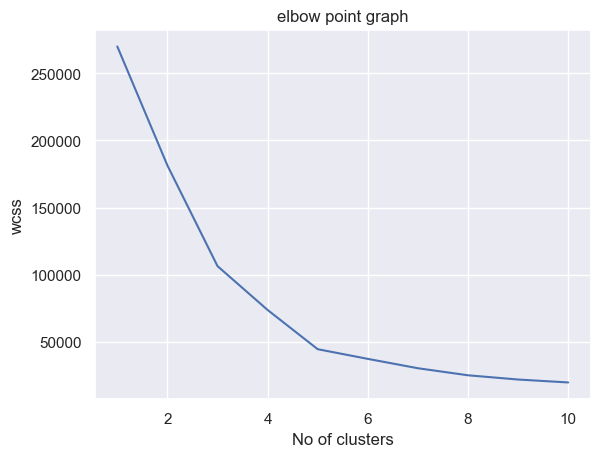

In [13]:
#data visualization
sns.set()
plt.plot(range(1,11), wcss)
plt.title('elbow point graph')
plt.xlabel('No of clusters')
plt.ylabel('wcss')
plt.show()

In [14]:
#training the KMeans clustering model
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0)
#return a label for each datapoint based in cluster
Y = kmeans.fit_predict(X)
print(Y)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


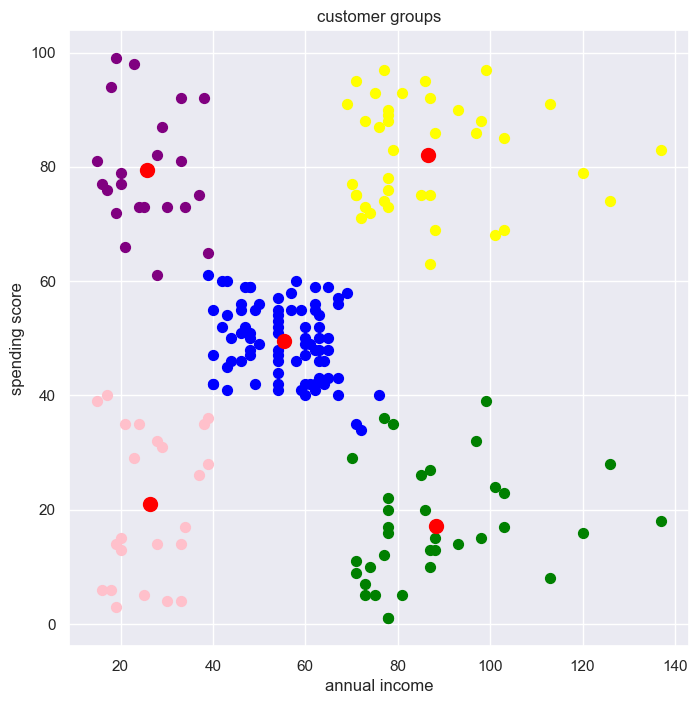

In [19]:
#plotting all clusters and their centriods
plt.figure(figsize = (8,8))
plt.scatter(X[Y==0,0], X[Y==0,1],s=50, c='green', label='cluster 1')
plt.scatter(X[Y==1,0], X[Y==1,1],s=50, c='blue', label='cluster 2')
plt.scatter(X[Y==2,0], X[Y==2,1],s=50, c='yellow', label='cluster 3')
plt.scatter(X[Y==3,0], X[Y==3,1],s=50, c='purple', label='cluster 4')
plt.scatter(X[Y==4,0], X[Y==4,1],s=50, c='pink', label='cluster 5')
#plotting centriods
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='red', label='centriods')
plt.title('customer groups')
plt.xlabel('annual income')
plt.ylabel('spending score')
plt.show()